In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## COLUMNS DESCRIPTION

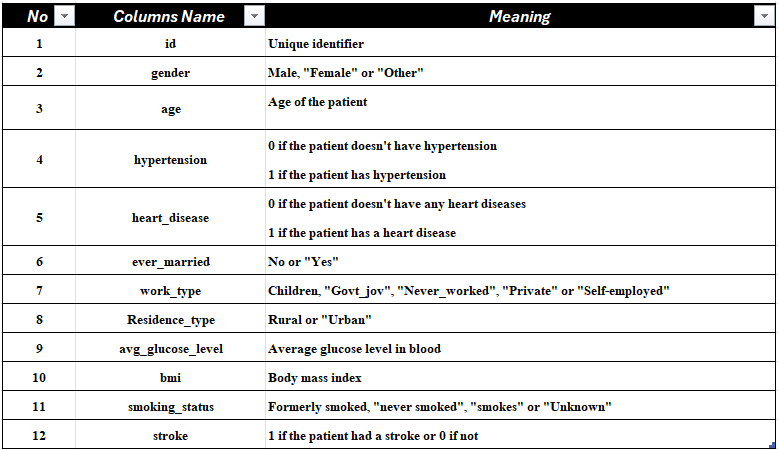

In [2]:
# get preliminary information like sample count and quality
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


# EDA 

In [8]:
# The 'id' column is dropped since the attribute holds no significant importance to the problem at hand
df = df.drop(['id'],axis=1)

In [9]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Target feature - Stroke

In [10]:
# Value count in the stroke attribute
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

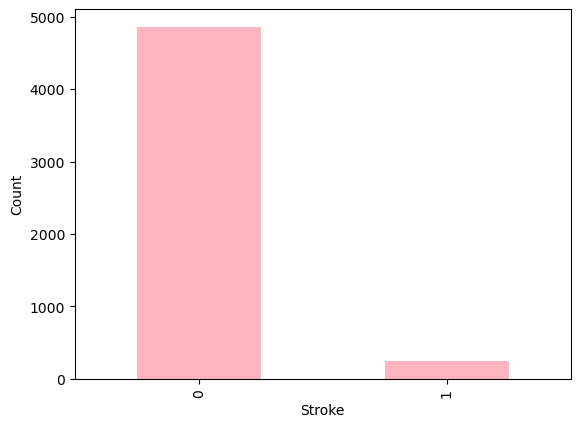

In [11]:
# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar",color = "lightpink")
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [12]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].\
                                                 value_counts().sum())*100)

% of people who actualy got a stroke :  4.87279843444227


In [13]:
a= df['stroke'].value_counts()[0]/df['stroke'].value_counts().sum()*100
print(a)

95.12720156555773


## Gender analysis

In [14]:
# Value count of evver married attribute
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<Axes: ylabel='gender'>

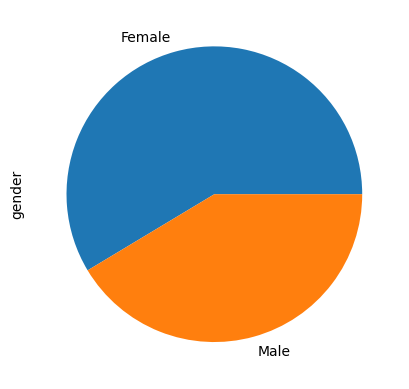

In [15]:
# Removing the 'other' gender instance inorder to reduce the dimension
df['gender'] = df['gender'].replace('Other','Female')
# plotting a pie chart to see the gender count distribution
df['gender'].value_counts().plot(kind="pie")

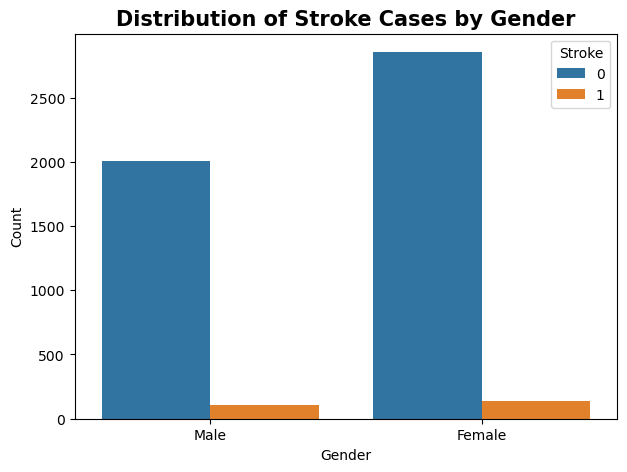

In [16]:
# Distribution of Stroke Cases by Gender
plt.figure(figsize=(7,5))
sns.countplot(x='gender', hue='stroke', data=df)
plt.title('Distribution of Stroke Cases by Gender', size = 15, weight = 'bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', loc='upper right')
plt.show()

## Age analysis

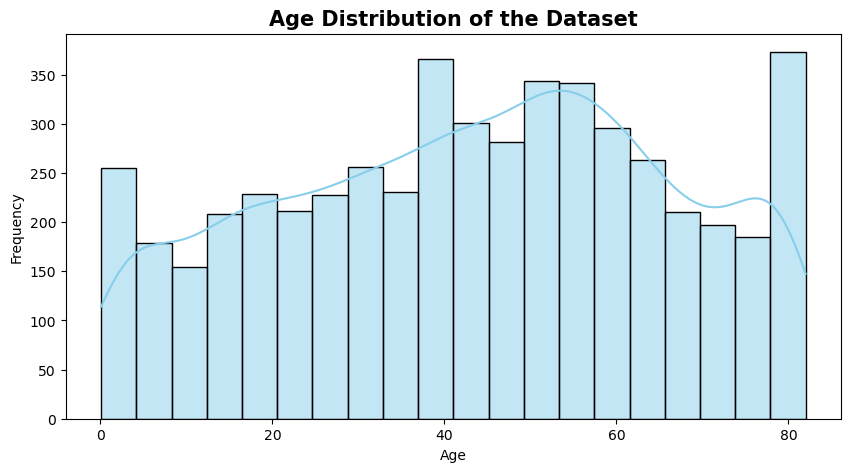

In [17]:
# Age Distribution of the Dataset
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of the Dataset', size = 15, weight = 'bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: >

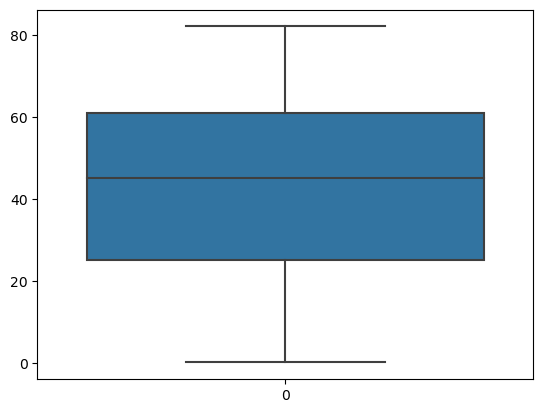

In [18]:
# boxplot
sns.boxplot(data=df['age'])

- The age parameter values does not have any outliers
- And has a normal distribution

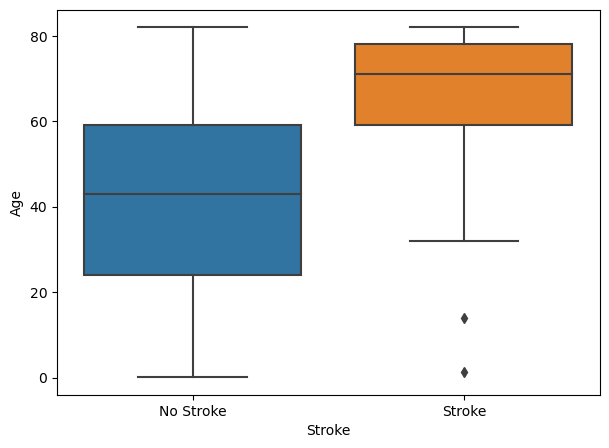

In [19]:
#  Boxplot of Glucose Level by Stroke Status
plt.figure(figsize=(7, 5))
sns.boxplot(x='stroke', y='age', data=df)
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()


## Hypertension analysis

In [20]:
# Value count of hypertension attribute
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

<Axes: >

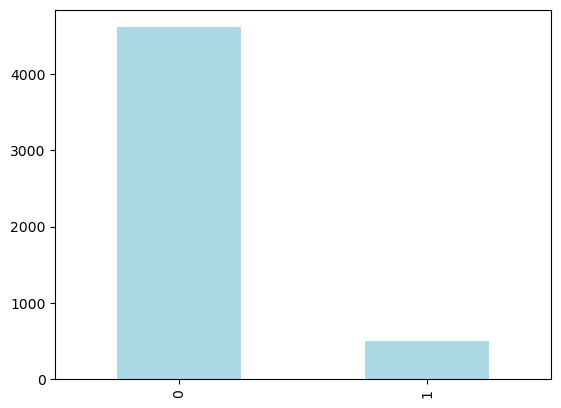

In [21]:
# Graphical representation of the value counts of the hypertension attribute
df['hypertension'].value_counts().plot(kind="bar",color = "lightblue")

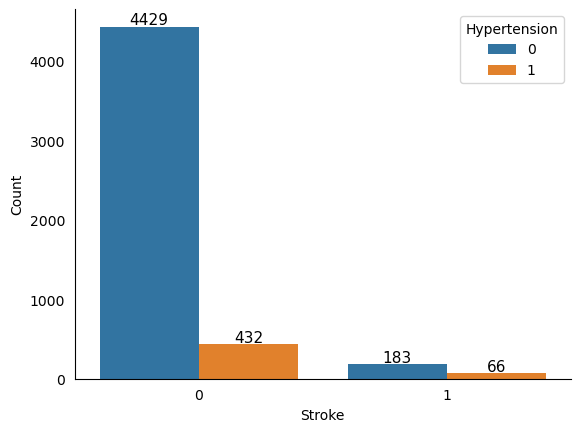

In [22]:
# Distribution of Hypertension and Heart Disease Cases
stroke_hypertension_counts = df.groupby(['stroke', 'hypertension']).size().reset_index(name='count')

# Vẽ biểu đồ phân phối
# plt.figure(figsize=(7, 5))
ax = sns.countplot(x='stroke', hue='hypertension', data=df)
#xoa vach diem chia
ax.tick_params(left = False, bottom = False)

l = ['right', 'top']
for i in l:
    ax.spines[i].set_visible(False)
    
# Thêm giá trị cụ thể lên biểu đồ và bỏ số thập phân
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Stroke')
plt.ylabel('Count')
plt.legend(title='Hypertension', loc='upper right')
plt.show()


## Heart_disease analysis

In [23]:
# Value count of heart disease attribute
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

<Axes: ylabel='heart_disease'>

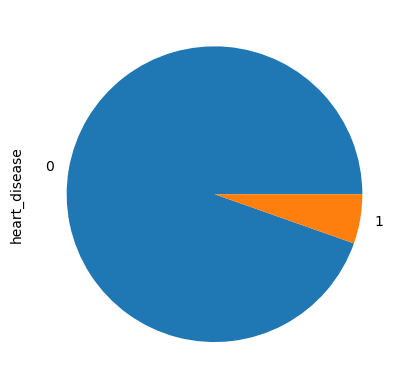

In [24]:
df['heart_disease'].value_counts().plot(kind="pie")

=> This data reflects that around 94.5 % of the total population or list of people are free from Heart_disease and only 6.5 % are having heart_disease.

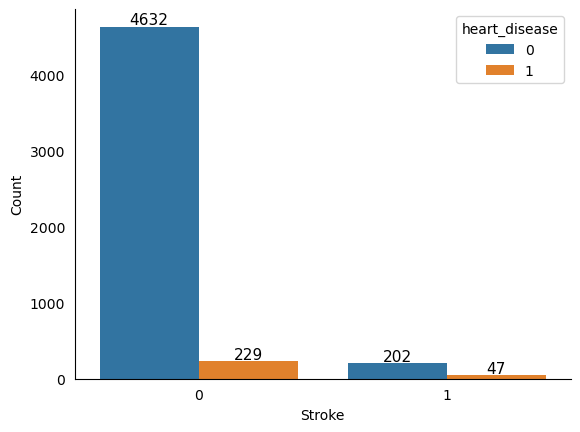

In [25]:
# Distribution of Stroke Cases by heart_disease
#plt.figure(figsize=(7,5))
#sns.countplot(x='stroke', hue='heart_disease', data=df)
#plt.xlabel('Stroke')
#plt.ylabel('Count')
#plt.legend(title='Heart_disease', loc='upper right')
#plt.show()


# Distribution of Hypertension and Heart Disease Cases
stroke_heartdisease_counts = df.groupby(['stroke', 'heart_disease']).size().reset_index(name='count')

# Vẽ biểu đồ phân phối
# plt.figure(figsize=(7, 5))
ax = sns.countplot(x='stroke', hue='heart_disease', data=df)
#xoa vach diem chia
ax.tick_params(left = False, bottom = False)

l = ['right', 'top']
for i in l:
    ax.spines[i].set_visible(False)
    
# Thêm giá trị cụ thể lên biểu đồ và bỏ số thập phân
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Stroke')
plt.ylabel('Count')
plt.legend(title='heart_disease', loc='upper right')
plt.show()


=>This plotting shows that the number of "people with Strokes but no heart disease" is approximately 6 to 8 times the number of "people with Strokes and also heart disease". This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.

## Ever_married analysis

In [26]:
# Value count of evver married attribute
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<Axes: ylabel='ever_married'>

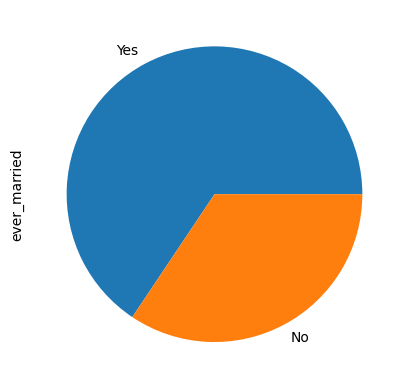

In [27]:
# Graphical representation
df['ever_married'].value_counts().plot(kind="pie")

- This result shows that 65.6 % of people from the list are married and 34.4 % are unmarried.

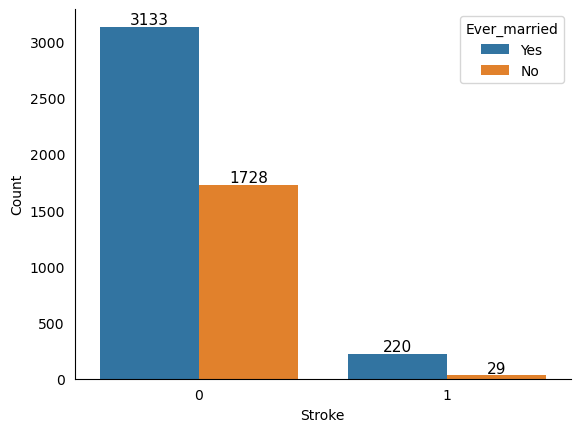

In [28]:
# Comparing stroke with married status
#sns.countplot(x='stroke', hue='ever_married', data=df)
stroke_evermarried_counts = df.groupby(['stroke', 'ever_married']).size().reset_index(name='count')

# Vẽ biểu đồ phân phối
# plt.figure(figsize=(7, 5))
ax = sns.countplot(x='stroke', hue='ever_married', data=df)
#xoa vach diem chia
ax.tick_params(left = False, bottom = False)

l = ['right', 'top']
for i in l:
    ax.spines[i].set_visible(False)
    
# Thêm giá trị cụ thể lên biểu đồ và bỏ số thập phân
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Stroke')
plt.ylabel('Count')
plt.legend(title='Ever_married', loc='upper right')
plt.show()

* This plotting shows that the number of "Married people with Strokes" is approximately 10 to 12 times the no. "Unmarried people with Strokes". 
* This shows most of the Married people got Strokes compared to Unmarried people.

## Work_type analysis

In [29]:
# Value of count of work-type attribute
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<Axes: ylabel='work_type'>

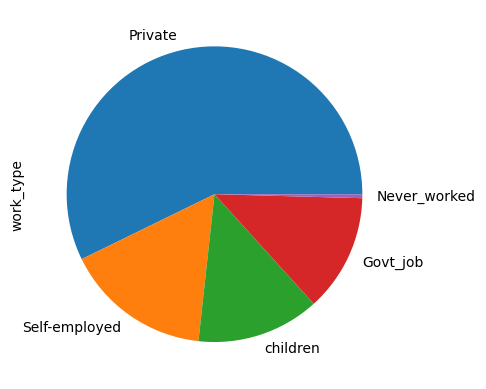

In [30]:
# Graphical representation of the value counts of the work-type attribute
df['work_type'].value_counts().plot(kind="pie")

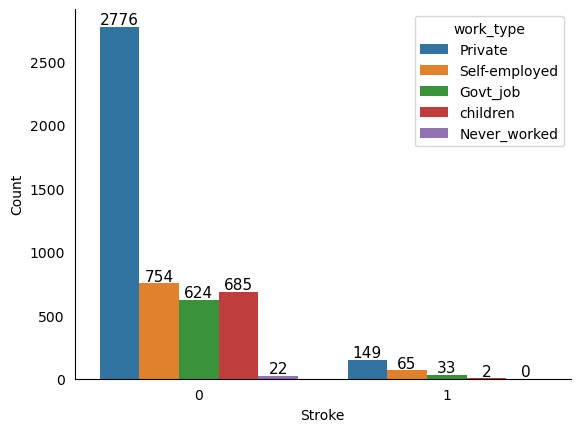

In [31]:
# Comparing stroke with work-type
#sns.countplot(x='stroke', hue='work_type', data=df)

stroke_worktype_counts = df.groupby(['stroke', 'work_type']).size().reset_index(name='count')
# Vẽ biểu đồ phân phối
# plt.figure(figsize=(7, 5))
ax = sns.countplot(x='stroke', hue='work_type', data=df)
#xoa vach diem chia
ax.tick_params(left = False, bottom = False)

l = ['right', 'top']
for i in l:
    ax.spines[i].set_visible(False)
    
# Thêm giá trị cụ thể lên biểu đồ và bỏ số thập phân
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Stroke')
plt.ylabel('Count')
plt.legend(title='work_type', loc='upper right')
plt.show()

* Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed got more strokes

## Residence_type analysis

In [32]:
# Value of count of residence attribute
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<Axes: ylabel='Residence_type'>

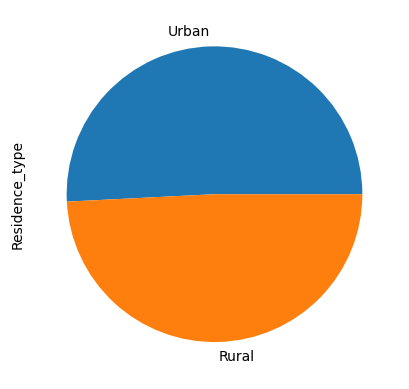

In [33]:
# Graphical representation of the value counts of the residence attribute
df['Residence_type'].value_counts().plot(kind="pie")

We have an equal percentage of population who are from Urban and rural areas

<Axes: xlabel='stroke', ylabel='count'>

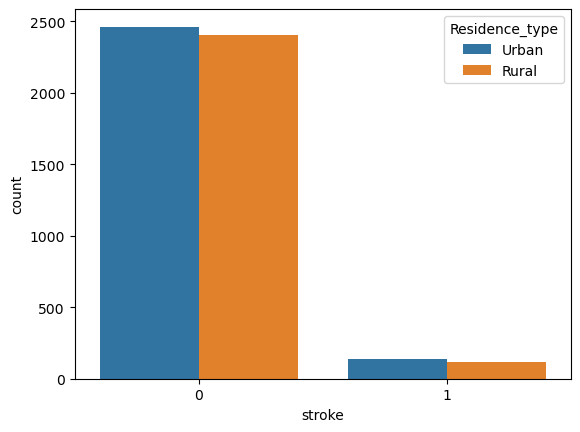

In [34]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=df)

* Based on the analysis the people who live in Urban areas were reported with more strokes

## Avg_glucose_level analysis

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

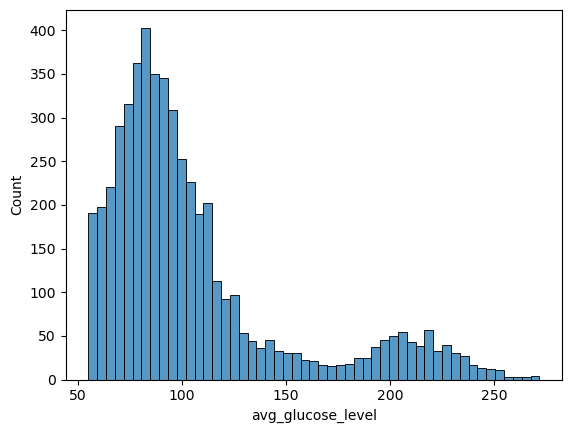

In [35]:
# Graphical representation fo the data in glucose level column
# histogram
sns.histplot(data=df['avg_glucose_level'])

<Axes: >

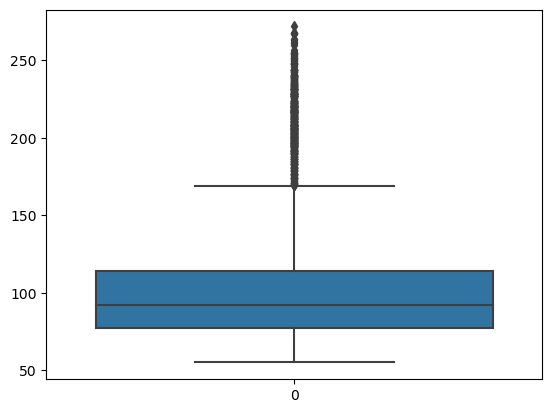

In [36]:
# Boxplot
sns.boxplot(data=df['avg_glucose_level'])

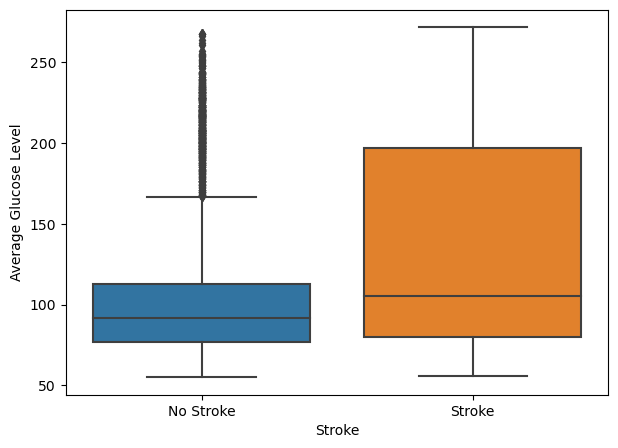

In [37]:
#  Boxplot of Glucose Level by Stroke Status
plt.figure(figsize=(7, 5))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df)
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()


## Smoking_status analysis

In [38]:
# Value of count of somoking status attribute
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

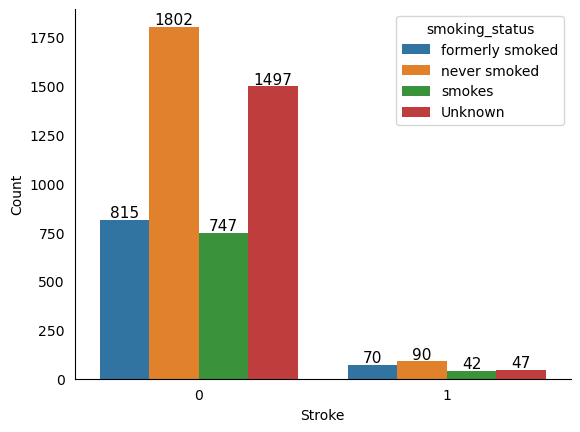

In [39]:
# Graphical representation of the value counts of the smoking staus attribute
# df['smoking_status'].value_counts().plot(kind="pie")

stroke_smokingstatus_counts = df.groupby(['stroke', 'smoking_status']).size().reset_index(name='count')
# Vẽ biểu đồ phân phối
# plt.figure(figsize=(7, 5))
ax = sns.countplot(x='stroke', hue='smoking_status', data=df)
#xoa vach diem chia
ax.tick_params(left = False, bottom = False)

l = ['right', 'top']
for i in l:
    ax.spines[i].set_visible(False)
    
# Thêm giá trị cụ thể lên biểu đồ và bỏ số thập phân
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Stroke')
plt.ylabel('Count')
plt.legend(title='smoking_status', loc='upper right')
plt.show()

=> Based on the plot we can that those who formerly smoked got more strokes The people who smoked and never smoked has a somewhat same probability of getting stroke

## bmi analysis

<Axes: xlabel='bmi', ylabel='Count'>

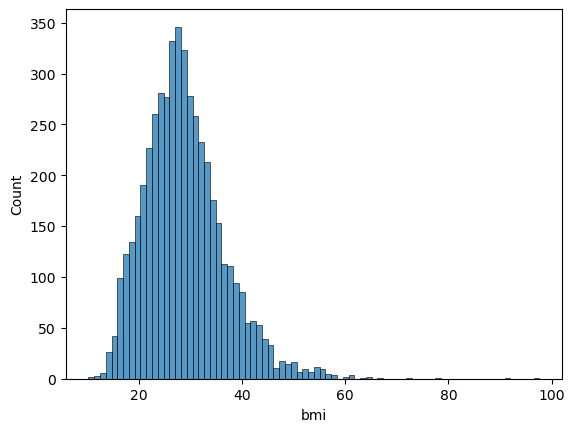

In [40]:
# Graphical representation of bmi attribute
sns.histplot(data=df['bmi'])

<Axes: >

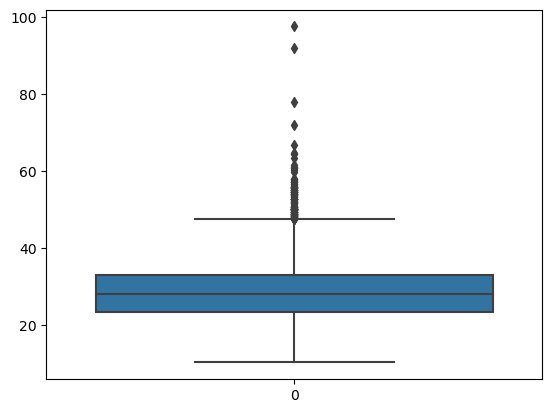

In [41]:
sns.boxplot(data=df['bmi'])

=> Based on the histogram and boxplot we see that there are many outliers in bmi

# Data Preprocessing

In [42]:
# Preprocessing and feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [43]:
def missing_value(val):
    total = val.isnull().sum().sort_values(ascending = False)
    percent = (val.isnull().sum()/val.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [44]:
missing_value(df)

,Total,Percent
bmi,201,3.933464
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


In [45]:
# Analysing whether to drop NA values in Bmi column
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())

Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


- Among the 201 bmi NULL values 40 values in them got stroke.=> Thus we cant drop NULL values
- Since there are outliers present we can’t perform mean imputation as mean is affected by the outliers
=> Hence we impute it with median values

In [46]:
# Imputing the missing N/A values using the median of bmi column
df['bmi']=df['bmi'].fillna(df['bmi'].median())
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [47]:
print(df['bmi'])

0       36.6
1       28.1
2       32.5
3       34.4
4       24.0
        ... 
5105    28.1
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64


In [48]:
# Converting numeric-binary value attributes to string
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df = pd.get_dummies(df, drop_first= True)

In [49]:
# Display the preprocessed data
df.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,1,0,1,1,0,1,0,0,1,1,0,0,1
1,61.0,202.21,28.1,0,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,105.92,32.5,1,0,1,1,0,1,0,0,0,0,1,0,1
3,49.0,171.23,34.4,0,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,174.12,24.0,0,1,0,1,0,0,1,0,0,0,1,0,1


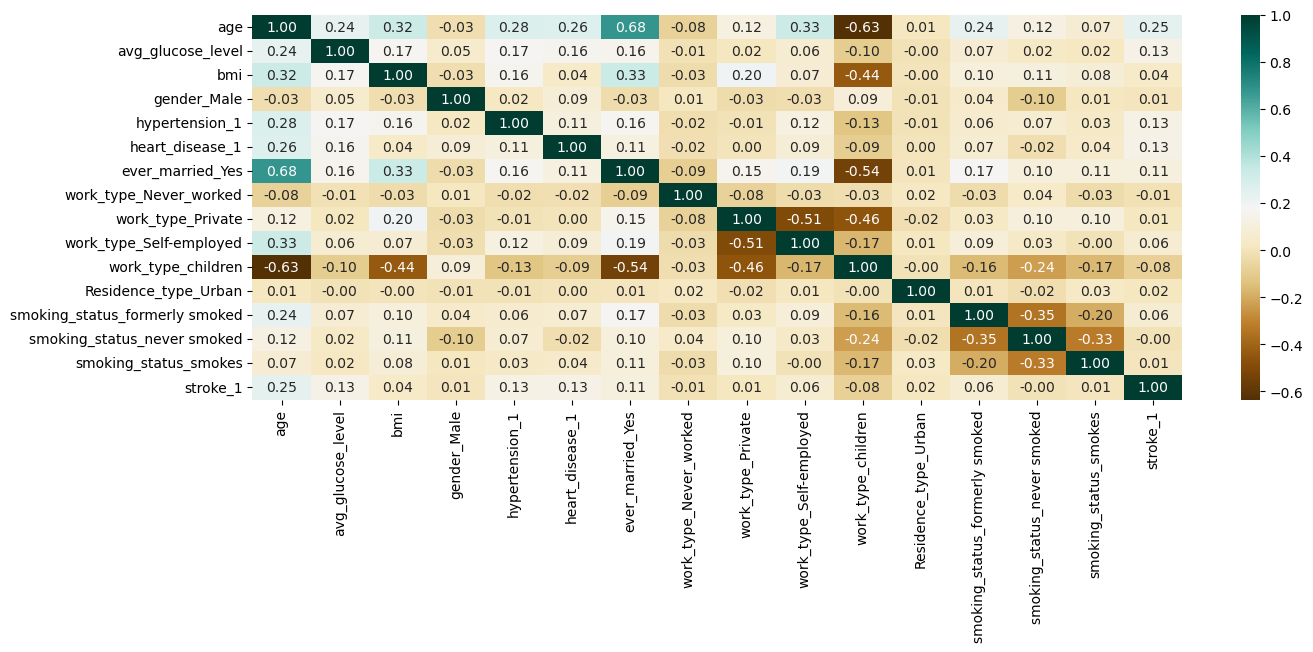

In [50]:
# Correlation matrix between the attributes in the dataset to find if any attributes are correlated
corr_matrix = df.corr()
plt.figure(figsize = (15, 5))
sns.heatmap(corr_matrix, fmt = '0.2f', cmap = 'BrBG', annot = True)
plt.show()

# Split Data to train and test Datasets

from imblearn.over_sampling import RandomOverSampler

#Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X = df.drop(['stroke'],axis=1)
y = df['stroke']

#Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

#Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
#Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

#Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.20, random_state= 42)

In [51]:
X = df.drop(['stroke_1'],axis=1)
y = df['stroke_1']
# Treating Imbalance Data using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 3)
x_smote, y_smote = smote.fit_resample(X, y)

s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)

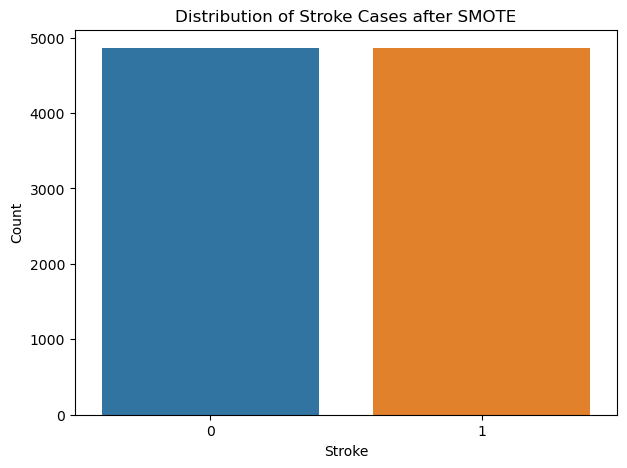

In [52]:
df_smote = pd.concat([pd.DataFrame(x_smote, columns=X.columns), pd.DataFrame(y_smote, columns=['stroke_1'])], axis=1)

# Vẽ biểu đồ phân phối của biến 'stroke'
plt.figure(figsize=(7, 5))
sns.countplot(x='stroke_1', data=df_smote)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Distribution of Stroke Cases after SMOTE')
plt.show()

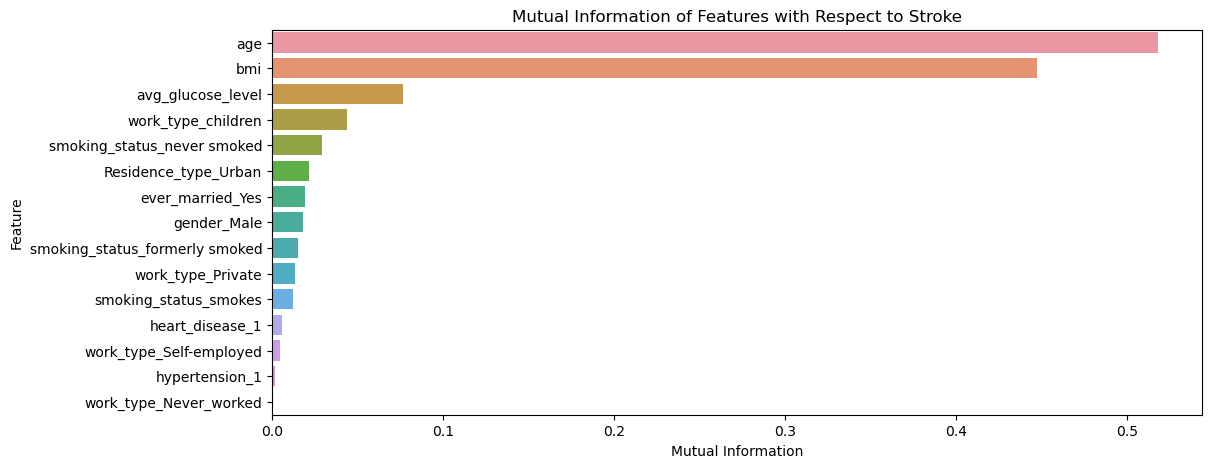

In [53]:
from sklearn.feature_selection import mutual_info_classif
# Tính toán mutual information
mutual_info = mutual_info_classif(x_smote, y_smote, random_state=42)
mutual_info_series = pd.Series(mutual_info, index=x_smote.columns)

# Hiển thị kết quả mutual information
mutual_info_df = mutual_info_series.reset_index()
mutual_info_df.columns = ['Feature', 'Mutual Information']

# Sắp xếp mutual information theo thứ tự giảm dần
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Vẽ biểu đồ mutual information
plt.figure(figsize=(12, 5))
sns.barplot(x='Mutual Information', y='Feature', data=mutual_info_df)
plt.title('Mutual Information of Features with Respect to Stroke')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.show()

In [54]:
# import sklearn metrics library
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

# For calculating scoring of model prediction
def evaluate_model(yt, yp):
    accuracy = accuracy_score(yt,yp)
    precision = precision_score(yt,yp)
    recall = recall_score(yt,yp)
    f1score = f1_score(yt,yp)
    
    metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_score': f1score}

    return metrics

# Confusion Matrix for model prediction

def conf_matrix(yt, yp):
    cm = confusion_matrix(yt, yp)
    sns.heatmap(cm, fmt='d', annot =  True, cmap = 'Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title('Confusion Matrix')
    plt.show()    

# Model training

   ## Logistic Regression

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Grid Search for Logistic Regression
params_grid = {
    'penalty': ['l1', 'l2'],
    'C' : [0, 0.2, 0.4, 0.6, 0.8, 1.0],
    'solver' : ['liblinear', 'sag', 'newton_cg', 'lbfgs']
}
logistic_model = LogisticRegression(max_iter = 1000, random_state = 42)

grid_search = GridSearchCV(estimator = logistic_model, param_grid = params_grid, cv = 5, scoring = 'f1', n_jobs = -1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
140 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ADMIN\anaconda3\lib\sit

{'C': 0.2, 'penalty': 'l1', 'solver': 'liblinear'}

In [56]:
logistic_model = LogisticRegression(penalty = 'l1', C = 0.2, solver = 'liblinear', random_state=42)
logistic_model.fit(X_train, y_train)
lr_pred = logistic_model.predict(X_test)

# Printing the evaluate_model 
evaluate_model(y_test, lr_pred)

{'Accuracy': 0.8632390745501285,
 'Precision': 0.8562753036437247,
 'Recall': 0.8721649484536083,
 'F1_score': 0.86414708886619}

Confusion Matrix:


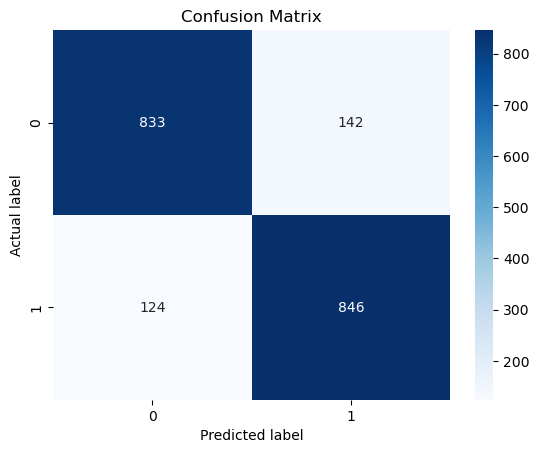

None


In [57]:
print("Confusion Matrix:")
print(conf_matrix(y_test, lr_pred))

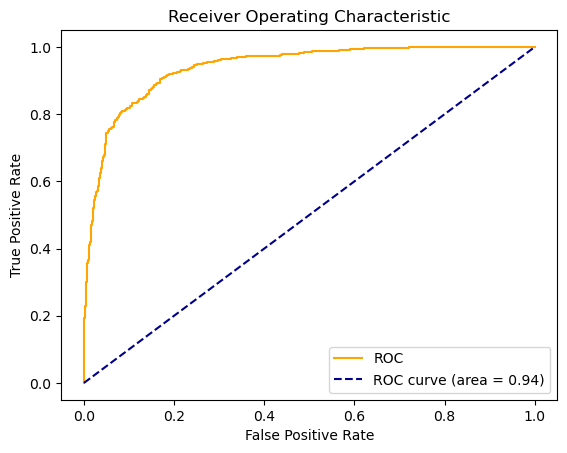

In [83]:
# Plot ROC curve
lr_pred_pro = logistic_model.predict_proba(X_test)
lr_pred_pro = lr_pred_pro[:, 1]

fpr, tpr, _ = roc_curve(y_test, lr_pred_pro)
auc = roc_auc_score(y_test, lr_pred_pro)

plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle ='--', label = 'ROC curve (area = %0.2f)' %auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [84]:
print(auc)

0.9399132963256674


## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}
model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1}

In [61]:
dtr = DecisionTreeClassifier(criterion = 'entropy', 
                            max_depth = 20,
                            min_samples_leaf = 1,
                            random_state=42)
dtr = dtr.fit(X_train,y_train)

#predicting result using the test dataset
dtr_pred = dtr.predict(X_test)

# Printing the evaluate_model 
evaluate_model(y_test, dtr_pred)


{'Accuracy': 0.9223650385604113,
 'Precision': 0.9090909090909091,
 'Recall': 0.9381443298969072,
 'F1_score': 0.9233891425672248}

Confusion Matrix:


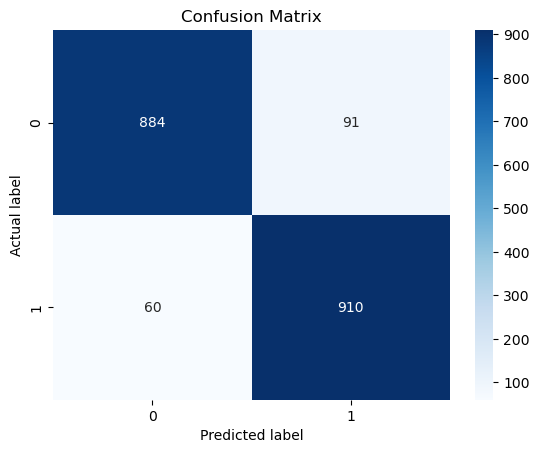

None


In [62]:
print("Confusion Matrix:")
print(conf_matrix(y_test, dtr_pred))

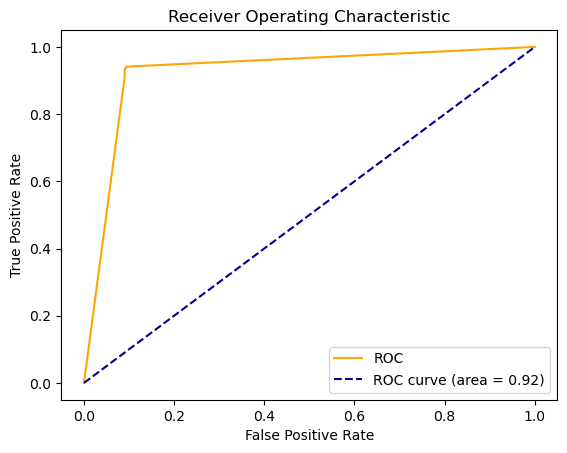

In [81]:
# Plot ROC curve
dtr_pred_pro = dtr.predict_proba(X_test)
dtr_pred_pro = dtr_pred_pro[:, 1]

fpr, tpr, _ = roc_curve(y_test, dtr_pred_pro)
auc2 = roc_auc_score(y_test, dtr_pred_pro)

plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle ='--', label = 'ROC curve (area = %0.2f)' %auc2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [82]:
print(auc2)

0.9239402590536611


## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],         
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],          
    'bootstrap': [True, False]               
}

rf = RandomForestClassifier(random_state=42)
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

#grid_search = GridSearchCV(estimator =knn, param_grid = params_grid, cv = 5, scoring = 'f1', n_jobs = -1)
# Fit GridSearchCV
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'bootstrap': False,
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [66]:
rf = RandomForestClassifier(n_estimators = 200, 
                            bootstrap = False,  
                            max_depth = None, 
                            min_samples_split = 2, 
                            min_samples_leaf = 1,
                           random_state=42)
rf = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Printing the evaluate_model 
evaluate_model(y_test, rf_pred)

{'Accuracy': 0.9491002570694087,
 'Precision': 0.9403437815975733,
 'Recall': 0.9587628865979382,
 'F1_score': 0.9494640122511484}

Confusion Matrix:


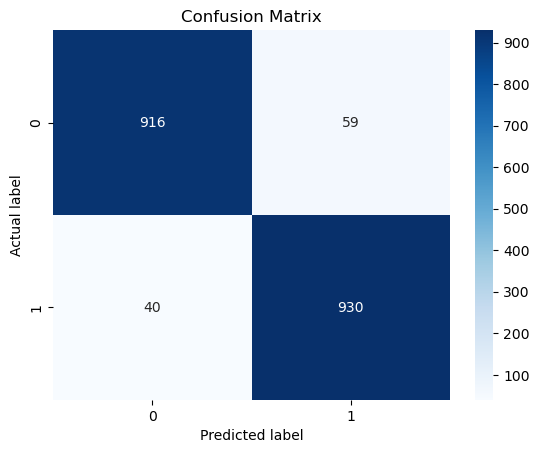

None


In [67]:
print("Confusion Matrix:")
print(conf_matrix(y_test, rf_pred))

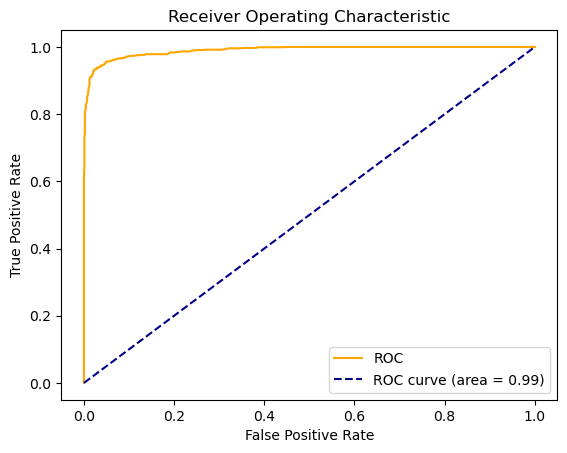

In [76]:
# Plot ROC curve
rf_pred_pro = rf.predict_proba(X_test)
rf_pred_pro = rf_pred_pro[:, 1]

fpr, tpr, _ = roc_curve(y_test, rf_pred_pro)
auc3 = roc_auc_score(y_test, rf_pred_pro)

plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle ='--', label = 'ROC curve (area = %0.2f)' %auc3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [77]:
print(auc3)

0.9897758392809939


## K-NN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

params_grid = {
    'n_neighbors' : [3,5,7,9,11,13,15],
    'metric' : ['minkowski', 'euclidean', 'manhattan'],
    'weights' : ['distance', 'uniform']
}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator =knn, param_grid = params_grid,
                          cv = 5, scoring = 'f1', n_jobs = -1)
grid_search.fit(X_train, y_train.values.ravel())

best_params = grid_search.best_params_
best_params

{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}

In [71]:
knn = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 3, weights = 'distance')
# Training the classifier
knn.fit(X_train,y_train)
#predicting result using the test dataset
knn_pred = knn.predict(X_test)

# Printing the evaluate_model 
evaluate_model(y_test, knn_pred)


{'Accuracy': 0.9084832904884319,
 'Precision': 0.8548387096774194,
 'Recall': 0.9835051546391752,
 'F1_score': 0.9146692233940557}

Confusion Matrix:


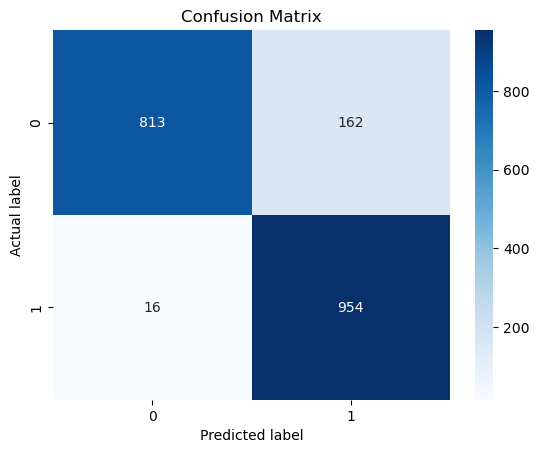

None


In [72]:
print("Confusion Matrix:")
print(conf_matrix(y_test, knn_pred))

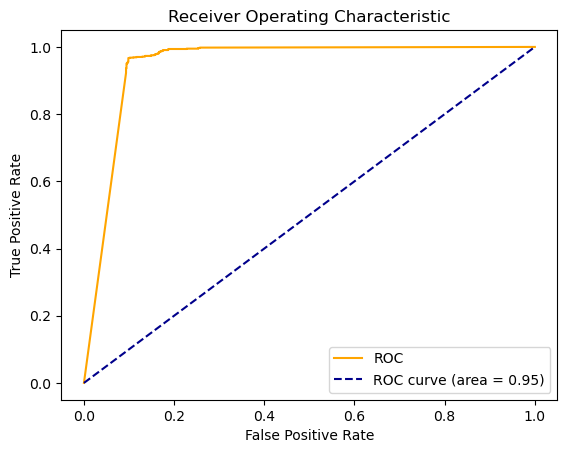

In [79]:
# Plot ROC curve
knn_pred_pro = knn.predict_proba(X_test)
knn_pred_pro = knn_pred_pro[:, 1]

fpr, tpr, _ = roc_curve(y_test, knn_pred_pro)
auc4 = roc_auc_score(y_test, knn_pred_pro)

plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle ='--', label = 'ROC curve (area = %0.2f)' %auc4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

In [80]:
print(auc4)

0.9461871530531324
